In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset
iris = datasets.load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target labels (species) to the DataFrame
df['species'] = iris.target

# Mapping numerical labels to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


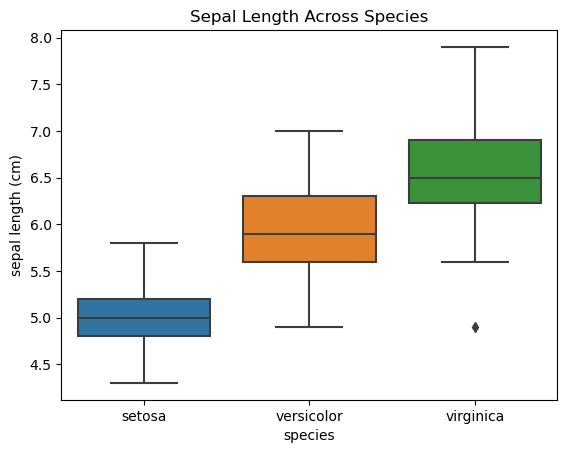

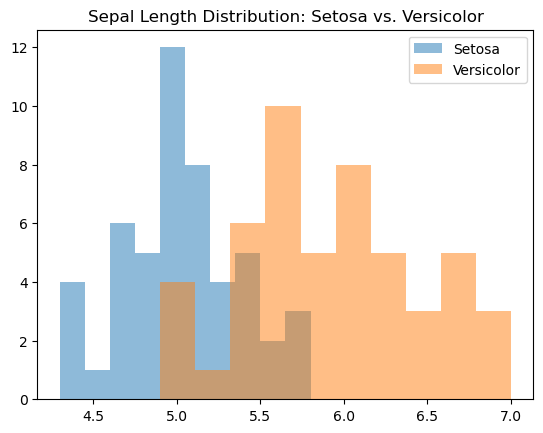

In [3]:
# Boxplot to compare sepal lengths across species
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length Across Species')
plt.show()

# Histograms to compare the distribution of sepal lengths for two species (setosa and versicolor)
setosa = df[df['species'] == 'setosa']['sepal length (cm)']
versicolor = df[df['species'] == 'versicolor']['sepal length (cm)']

plt.hist(setosa, alpha=0.5, label='Setosa')
plt.hist(versicolor, alpha=0.5, label='Versicolor')
plt.legend(loc='upper right')
plt.title('Sepal Length Distribution: Setosa vs. Versicolor')
plt.show()


In [4]:
# Perform the independent t-test
t_stat, p_value = stats.ttest_ind(setosa, versicolor)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: -10.52098626754911
P-value: 8.985235037487079e-18


In [5]:
# Create bins for sepal width
df['sepal_width_category'] = pd.cut(df['sepal width (cm)'], bins=[0, 2.5, 3.0, 3.5, 4.0, 5.0], labels=['very narrow', 'narrow', 'medium', 'wide', 'very wide'])

# Create a contingency table
contingency_table = pd.crosstab(df['sepal_width_category'], df['species'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f'Chi2 Statistic: {chi2_stat}')
print(f'P-value: {p_value}')


Chi2 Statistic: 60.13322368421053
P-value: 4.3887773154654894e-10


In [6]:
# Separate the sepal length data by species
setosa_sepal = df[df['species'] == 'setosa']['sepal length (cm)']
versicolor_sepal = df[df['species'] == 'versicolor']['sepal length (cm)']
virginica_sepal = df[df['species'] == 'virginica']['sepal length (cm)']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(setosa_sepal, versicolor_sepal, virginica_sepal)

# Display the results
print(f'F-statistic: {f_stat}')
print(f'P-value: {p_value}')


F-statistic: 119.26450218450468
P-value: 1.6696691907693826e-31
